In [2]:
import pandas as pd
import os
from skimage import io
import numpy as np
from matplotlib import pyplot as plt
import nanoscope
from skimage import color, io
from PIL import Image

afm_csv = '/Users/nils/CC/afm-cnn/data/raw/afm.csv'
raw_data_dir = '/Users/nils/CC/Data/afm'
gan_data_dir = '/Users/nils/CC/afm-cnn/GAN/data/'

Needed to convert the filenames from the original database on my old computer

In [3]:
# df_mg = pd.read_csv(afm_csv)
# df_mg['imPath'] = df_mg['imPath'].apply(lambda s: s.replace('Imperssonator/CC/uhcs/data/afm',
#                                                            'nils/CC/Data/afm/raw'))
# df_mg['rawPath'] = df_mg['rawPath'].apply(lambda s: s.replace('Data',
#                                                            '/Users/nils/CC/Data/afm'))
# df_mg.to_csv(path_or_buf=os.path.join(raw_data_dir,'afm.csv'),index=False)

In [4]:
df = pd.read_csv(os.path.join(raw_data_dir,'afm.csv'))
df.loc[df.channel=='Phase']

,id,noise,secondaryNoise,fiber,rawPath,channel,sizeX,sizeY,sizeX_nm,sizeY_nm,user,imPath
2,3,hl,NaN,NaN,/Users/nils/CC/Data/afm/capture/Anna/PEDOT_LiB...,Phase,256,256,5000,5000,Anna,/Users/nils/CC/Data/afm/raw/3.tif
5,6,hl,NaN,NaN,/Users/nils/CC/Data/afm/capture/Anna/PEDOT_LiB...,Phase,256,256,15000,15000,Anna,/Users/nils/CC/Data/afm/raw/6.tif
8,9,NaN,NaN,NaN,/Users/nils/CC/Data/afm/capture/Anna/PEDOT_LiB...,Phase,256,256,15000,15000,Anna,/Users/nils/CC/Data/afm/raw/9.tif
11,12,hl,NaN,NaN,/Users/nils/CC/Data/afm/capture/Anna/PEDOT_TBA...,Phase,256,256,15000,15000,Anna,/Users/nils/CC/Data/afm/raw/12.tif
14,15,hl,NaN,NaN,/Users/nils/CC/Data/afm/capture/Anna/PEDOT_TBA...,Phase,256,256,15000,15000,Anna,/Users/nils/CC/Data/afm/raw/15.tif
17,18,NaN,NaN,NaN,/Users/nils/CC/Data/afm/capture/Anna/PEDOT_TBA...,Phase,256,256,15000,15000,Anna,/Users/nils/CC/Data/afm/raw/18.tif
20,21,NaN,NaN,NaN,/Users/nils/CC/Data/afm/capture/Bailey/Blade c...,Phase,512,512,2000,2000,Bailey,/Users/nils/CC/Data/afm/raw/21.tif
23,24,NaN,NaN,NaN,/Users/nils/CC/Data/afm/capture/Bailey/Blade c...,Phase,512,512,2000,2000,Bailey,/Users/nils/CC/Data/afm/raw/24.tif
26,27,NaN,NaN,NaN,/Users/nils/CC/Data/afm/capture/Bailey/Blade c...,Phase,512,512,2000,2000,Bailey,/Users/nils/CC/Data/afm/raw/27.tif
29,30,vg,NaN,NaN,/Users/nils/CC/Data/afm/capture/Bailey/Blade c...,Phase,512,512,2000,2000,Bailey,/Users/nils/CC/Data/afm/raw/30.tif


What is the actual distribution of image sizes...?

In [5]:
np.unique(df.loc[df.channel=='Phase'].sizeX,return_counts=True)

(array([  32,  128,  256,  512, 1024, 2048, 4096]),
 array([   1,    2, 3628, 1624,   61,    5,    2]))

Try loading an image from imPath and displaying a processed raw file from rawPath just to confirm

<IPython.core.display.Javascript object>


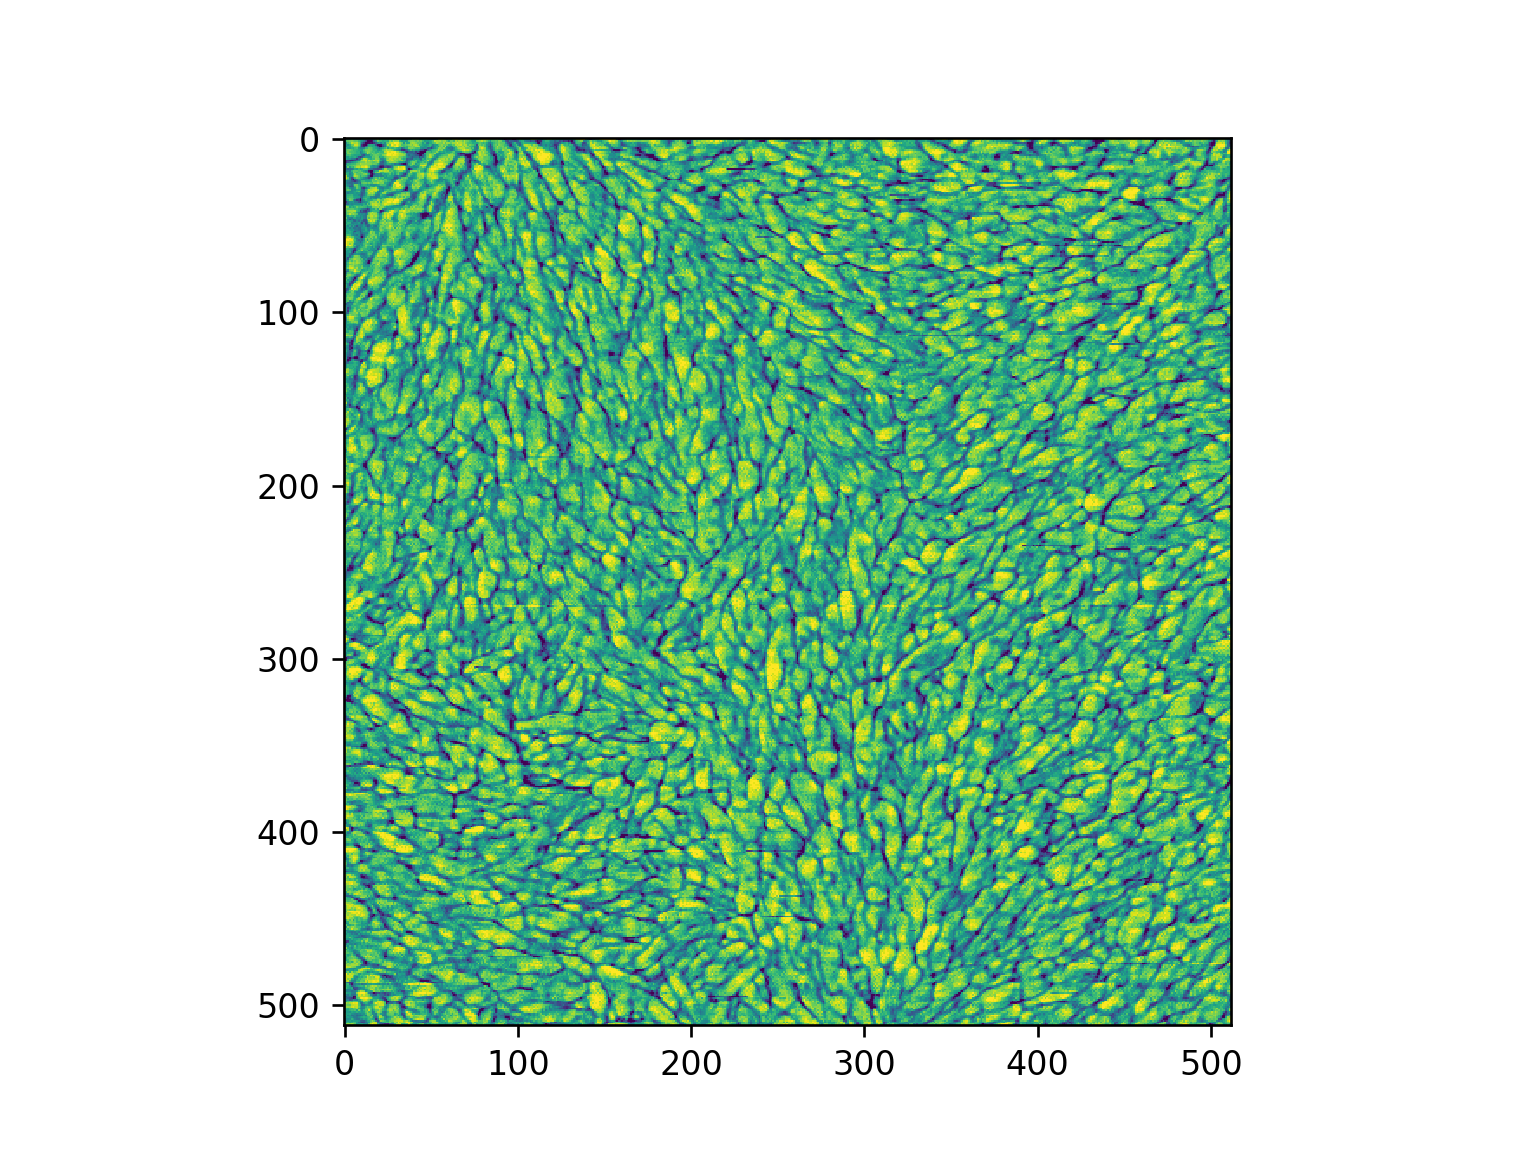

In [6]:
%matplotlib notebook
plt.imshow(io.imread(df.loc[20]['imPath']))

<IPython.core.display.Javascript object>


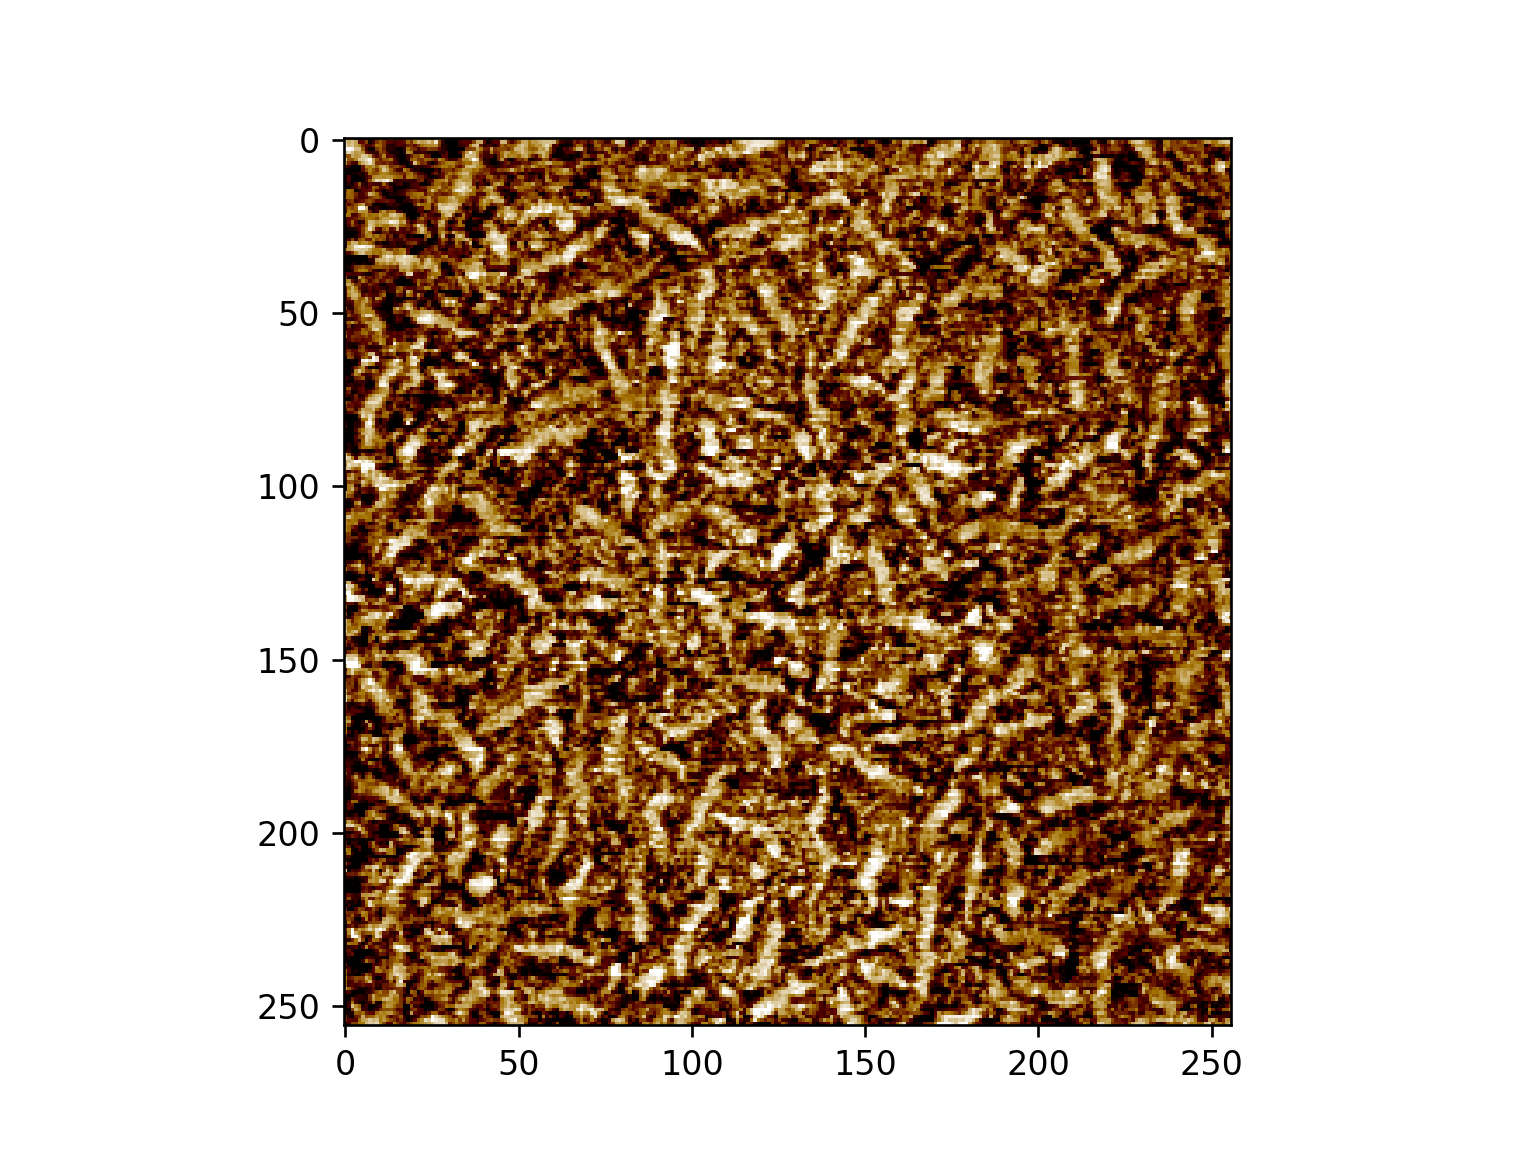

In [8]:
file = df.loc[482]['rawPath']
afm=nanoscope.read(file)
phase=afm.images['Phase'].process().flatten(order=3).colorize()
plt.figure()
plt.imshow(phase)

Ok, let's make images of all 3,600 of the 256x256 phase files

In [9]:
phase256 = df.loc[df.channel=='Phase'].loc[df.sizeX==256]

In [10]:
phase256.iloc[0]

id                                                                3
noise                                                            hl
secondaryNoise                                                  NaN
fiber                                                           NaN
rawPath           /Users/nils/CC/Data/afm/capture/Anna/PEDOT_LiB...
channel                                                       Phase
sizeX                                                           256
sizeY                                                           256
sizeX_nm                                                       5000
sizeY_nm                                                       5000
user                                                           Anna
imPath                            /Users/nils/CC/Data/afm/raw/3.tif
Name: 2, dtype: object

Had to edit nanoscope.py lines 192-195 to try parse_parameter and continue if it fails...

In [12]:
fails = 0

for i,row in phase256.iterrows():
    file = row['rawPath']
    print('file {} of {}'.format(i,max(phase256.id)))
    print(file)
    im_id = str(row['id'])
    
    try:
        afm = nanoscope.read(file)
    except:
        print('wtf')
        fails += 1
        continue
    
    phase = afm.images['Phase'].process().flatten(order=3).colorize()
    gray = color.rgb2gray(phase)
    io.imsave(os.path.join(gan_data_dir,'phase256',im_id+'.png'),
             gray)

file 2 of 16091
/Users/nils/CC/Data/afm/capture/Anna/PEDOT_LiBTI.001


/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


file 5 of 16091
/Users/nils/CC/Data/afm/capture/Anna/PEDOT_LiBTI.003
file 8 of 16091
/Users/nils/CC/Data/afm/capture/Anna/PEDOT_LiBTI.004
file 11 of 16091
/Users/nils/CC/Data/afm/capture/Anna/PEDOT_TBA.000
file 14 of 16091
/Users/nils/CC/Data/afm/capture/Anna/PEDOT_TBA.001
file 17 of 16091
/Users/nils/CC/Data/afm/capture/Anna/PEDOT_TBA_center.002
file 149 of 16091
/Users/nils/CC/Data/afm/capture/Boyi/041814/PDBTz_o-xyleneRT.001
file 203 of 16091
/Users/nils/CC/Data/afm/capture/Boyi/082913/8202013 Spin Optimized.000
file 338 of 16091
/Users/nils/CC/Data/afm/capture/Brian/TPADPP/P4 1.000
file 341 of 16091
/Users/nils/CC/Data/afm/capture/Brian/TPADPP/P4 1.001
file 344 of 16091
/Users/nils/CC/Data/afm/capture/Brian/TPADPP/P4 1.002
file 464 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/10-1-2013/CF_1min_N.000
file 467 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/10-1-2013/CF_2min.000
file 470 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/10-1-2013/CF_2min_N.000
file 475 of 16091
/Users/

file 778 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-19-2013/Bad Tip/CB_Prst_1(2).000
file 781 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-19-2013/Bad Tip/CB_Prst_1.000
file 784 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-19-2013/Bad Tip/CB_Prst_2.000
file 793 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-19-2013/CB_20%_1.000
file 796 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-19-2013/CB_30%_1.000
file 799 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-19-2013/CB_40%_1.000
file 802 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-25-2013/NSC-14(New)/CB_0%_2min.000
file 805 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-25-2013/NSC-14(New)/CF_10%_0min.000
file 808 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-25-2013/NSC-14(New)/CF_10%_1min.000
file 811 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-25-2013/NSC-14(New)/CF_10%_3min.000
file 814 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/11-25-2013/CF_10%_0min.000
file 817 of 16091
/Users/nil

file 1177 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-6-2014/CB_40%_2min.002
file 1180 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-6-2014/CB_40%_2min_2.000
file 1183 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-6-2014/CB_40%_2min_3.000
file 1186 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-6-2014/CB_50%_2min.000
file 1189 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-6-2014/CB_5min.000
file 1192 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-9-2015/Key-One/Sample 1_2um.000
file 1195 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-9-2015/Key-One/Sample 1_2um_2.000
file 1198 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-9-2015/Key-One/Sample 1_2um_3.000
file 1201 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-9-2015/Key-One/Sample 1_2um_4.000
file 1204 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-9-2015/Key-One/Sample 1_2um_5.000
file 1213 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2-9-2015/Key-One/Sample 2_2um.000
file 1219 of 16091
/Users/nils/CC/Da

file 1629 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-6-30/NK2-90d-H2.000
file 1632 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-6-30/NK2-90d-H2_2.000
file 1635 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-6-30/NK2-90d-S2.000
file 1653 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-7-16/Cornelia/Cornelia_7-9/Si Bullet.000
file 1656 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-7-16/Cornelia/Cornelia_7-9/Si PSLG.000
file 1659 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-7-16/Cornelia/Cornelia_7-9/Si PSLG_2.000
file 1662 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-7-16/Cornelia/p3ht-pslg-20ul.000
file 1665 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-7-16/Cornelia/p3ht-pslg.000
file 1671 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-7-16/Cornelia/p3ht-si.000
file 1674 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-7-16/Cornelia/p3ht.000
file 1686 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/2015-7-16/88d-day4-h2.000
file

file 1993 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/12-3.000
file 1996 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/12-3_5um.000
file 1999 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/12-4.000
file 2002 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/12-4_5um.000
file 2005 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/Back_No UV_5%.000
file 2008 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/Back_No UV_5%_5um.000
file 2011 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/Back_UV_5%.000
file 2014 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/Pristine_Tips(2).001
file 2017 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/Pristine_Tips(2)_1min.001
file 2020 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/Pristine_Tips(2)_1min_2.000
file 2023 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/Pristine_Tips(2)_2min.001
file 2026 of 16091
/Users/nils/CC/Data/afm/capture/Dalsu/7-2-2014/Pristine

/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/2333.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 2335 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing -0.055
file 2338 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing -0.056
file 2341 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing silicon 050-10um.000
file 2344 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing silicon 050-2-2um.000
file 2347 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing silicon 050-2-5um.000
file 2350 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing silicon 050-5um.000
file 2353 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing silicon 050.000
file 2356 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing silicon 10um.000
file 2359 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/microfluidic printing silicon 2um-2.000
file 2362 of 16091
/Users/nils/CC/Data/afm/capture/Gang/08042015/mi

/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/2532.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 2534 of 16091
/Users/nils/CC/Data/afm/capture/Gang/2015.03.20/p3ht in toluene 2 um after MFU.006


/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/2535.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 2537 of 16091
/Users/nils/CC/Data/afm/capture/Gang/2015.03.20/p3ht in toluene 500 after MFU.009


/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/2538.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 2540 of 16091
/Users/nils/CC/Data/afm/capture/Gang/2015.03.20/p3ht in toluene 500 after MFU.010
file 2543 of 16091
/Users/nils/CC/Data/afm/capture/Gang/2015.03.20/p3ht in toluene pristine 1um.000
file 2546 of 16091
/Users/nils/CC/Data/afm/capture/Gang/2015.03.20/p3ht in toluene pristine 2um.000
file 2678 of 16091
/Users/nils/CC/Data/afm/capture/Gang/Erdal/2105-06-09 training/Ag_nanowire.001
file 2681 of 16091
/Users/nils/CC/Data/afm/capture/Gang/Erdal/2105-06-09 training/Ag_nanowire.002
file 2684 of 16091
/Users/nils/CC/Data/afm/capture/Gang/nabil/NK2-88a-12H.000
file 2687 of 16091
/Users/nils/CC/Data/afm/capture/Gang/nabil/NK2-88a-18H.000
file 2690 of 16091
/Users/nils/CC/Data/afm/capture/Gang/nabil/NK2-90a-0h.000
file 2693 of 16091
/Users/nils/CC/Data/afm/capture/Gang/nabil/NK2-90a-0h.001
file 2696 of 16091
/Users/nils/CC/Data/afm/capture/Gang/nabil/NK2-90a-0h.002
file 2701 of 16091
/Users/nils/CC/Data/afm/capture/Gio/test.002
file 2716 of 16091
/Users/nils/CC/Data/afm/capture/G

/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/3202.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 3204 of 16091
/Users/nils/CC/Data/afm/capture/Haihua/20160324/20160321-7-1.001
file 3522 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-04-02/20150402_ PCBM_P3HT_no_anneal_2um.000
file 3525 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-04-02/20150402_ PCBM_P3HT_no_anneal_2um.001
file 3528 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-04-02/20150402_ PCBM_P3HT_no_anneal_500nm.000
file 3531 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-05-26/DPP2TTT blade.000
file 3534 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-05-26/DPP2TTT blade.001
file 3537 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-05-26/DPP2TTT blade.002
file 3540 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-05-26/DPP2TTT blade.003
file 3543 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-05-29/P3HTPC60BM DCB no anneal.000
file 3546 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-06-01/P2-CB.001
file 3549 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-06-01/P2-CB.002
file 3552 of 16091


file 3770 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 20_1 mm 1.002
file 3773 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 20_1 mm 1.003
file 3776 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 20_2 mm 1.000
file 3779 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 20_2 mm 1.001
file 3782 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 20_2 mm 1.002
file 3785 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 25_1 mm 1.000
file 3788 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 25_1 mm 1.001
file 3791 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 25_1 mm 1.002
file 3794 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 25_1 mm 1.003
file 3797 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-07-01 P2 (10mm2mm25mm)/P2 25_1 mm 1.004


file 3998 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-15 P3HT and P2 with SWCNT dropcast/2-DPP TCE solution.011
file 4001 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-15 P3HT and P2 with SWCNT dropcast/P3HT.000
file 4004 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-15 P3HT and P2 with SWCNT dropcast/P3HT.001
file 4007 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-15 P3HT and P2 with SWCNT dropcast/P3HT.002
file 4010 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-15 P3HT and P2 with SWCNT dropcast/P3HT.003
file 4013 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-15 P3HT and P2 with SWCNT dropcast/P3HT.004
file 4016 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-15 P3HT and P2 with SWCNT dropcast/P3HT.005
file 4019 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-17 P3HT and P2 with SWCNT blade coated/IV-P3HT.000
file 4022 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2015-09-17 P3HT and P2 with SWCNT blade coated/IV-P3HT.001
file 4025

file 4235 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-02-24 FMJ25/g100_s50_center_of_filmm.000
file 4238 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-02-24 FMJ25/g100_s50_top_of_film.001
file 4241 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-04-21 FDTS SLAC samples EH/FDTS_EH_blade_25C_BHJ.000
file 4244 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-04-21 FDTS SLAC samples EH/FDTS_EH_blade_25C_pristine.000
file 4247 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-04-21 FDTS SLAC samples EH/FDTS_EH_blade_45C_BHJ.000
file 4250 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-04-21 FDTS SLAC samples EH/FDTS_EH_blade_45C_pristine.000
file 4253 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-04-21 FDTS SLAC samples EH/FDTS_EH_blade_45C_pristine.001
file 4256 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-04-21 FDTS SLAC samples EH/FDTS_EH_spin_BHJ.000
file 4259 of 16091
/Users/nils/CC/Data/afm/capture/Ian/2016-04-21 FDTS SLAC samples EH/FDTS_EH_spin_pristine.000
f

file 4537 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed cured CF Hot wash.005
file 4540 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed cured CF Hot wash.006
file 4543 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed cured CF Hot wash.008
file 4550 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed cured CF Hot wash.011
file 4553 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed cured CF Hot wash.013
file 4558 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed cured CF wash.002
file 4561 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed cured CF wash.003
file 4564 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed cured.001
file 4567 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/organic processed.000
file 4570 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/Brian/polyelectrolyte cured and washed.000
file 4573 of 16091
/U

file 4825 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/T3TPD spin neat002.001
file 4828 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/T3TPD spin neat002.002
file 4831 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/T3TPD spin neat002.003
file 4834 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD BHJ Spin.000
file 4837 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD BHJ Spin.001
file 4840 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD BHJ Spin.002
file 4843 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD BHJ Spin.003
file 4846 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD DIO.000
file 4849 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD DIO.001
file 4852 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD DIO.002
file 4855 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD DIO.003
file 4858 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/TPD DIO.004
file 4861 of 16091
/Users/nils/CC/Data/afm/capture/Jeff/TPD/blade coat BHJ w_o DIO.

file 5155 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB4-2(1um).001
file 5158 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB4-2(1um).002
file 5161 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB4-2(1um).005
file 5164 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB4-2(2um).004
file 5167 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB4-2.000
file 5170 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB4-2.001
file 5173 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB5-2(7%)(1um).000
file 5176 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB5-2(7%)(4um).000
file 5179 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB1-3/DCB5-2(7%).000
file 5182 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB10/DCB10-2(1um).000
file 5185 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB10/DCB10-2.000
file 5188 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB10/DCB10-2.001
file 5191 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/DCB10/DCB

file 5476 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE/PE2-4.000
file 5479 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE/PE2-4.001
file 5482 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE/PE3-1.000
file 5485 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE/PE3-2.001
file 5488 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE/PE3-3.000
file 5491 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE/PE3-4.000
file 5494 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE/PE3-4.001
file 5497 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE1/PE1-1.000
file 5500 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE1/PE1-1.001
file 5503 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE1/PE1-2.000
file 5506 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE1/PE1-2.001
file 5509 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE1/PE1-2.002
file 5512 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE1/PE1-2.003
file 5515 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PE1/PE1-2.004
file 5518 of 16091
/Users/n

file 5815 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB back/PPB3-5.000
file 5818 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB back/PPB3-5.001
file 5821 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB back/PPB3-5.002
file 5824 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB back/PPB3-5.003
file 5827 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB3-back/PPB3-1back(2um).003
file 5830 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB3-back/PPB3-1back(2um).004
file 5833 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB3-back/PPB3-1back(2um).005
file 5836 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB3-back/PPB3-1back(2um).006
file 5839 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB3-back/PPB3-1back(2um).012
file 5842 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB3-back/PPB3-1back(4um).000
file 5845 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB3-back/PPB3-1back(4um).001
file 5848 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB3-back/PPB3-1back(4um).002
file 585

file 6127 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV1 updated/UV1-6re.000
file 6130 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV1re/UV1-3 re.000
file 6133 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV1re/UV1-3 re.001
file 6136 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV1re/UV1-4 re.000
file 6139 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV1re/UV1-5 re.000
file 6142 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV1re/UV1-5 re.001
file 6145 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV1re/UV1-6 re.000
file 6148 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV2/UV2-1.000
file 6151 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV2/UV2-1.001
file 6154 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV2/UV2-2.000
file 6157 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV2/UV2-2.001
file 6160 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV2/UV2-3.000
file 6163 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV/UV2/UV2-3.001
file 6166 o

file 6460 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV18/UV18-3.002
file 6463 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV18/UV18-3.003
file 6466 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV19/UV19-1.000
file 6469 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV19/UV19-2.000
file 6472 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV19/UV19-2.001
file 6475 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV19/UV19-2.002
file 6478 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV19/UV19-2.003
file 6481 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV19/UV19-3.000
file 6484 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV19/UV19-3.001
file 6487 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV19/UV19-3.002
file 6490 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV20/UV20-1.000
file 6493 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV20/UV20-1.001
file 6496 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV20/UV20-1.002
file 6499 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV20/UV2

file 6796 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PB1_0%_01_AFM_2um.002
file 6799 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB9-5 glass.000
file 6802 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/PPB9-5 polymer.000
file 6805 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV ordering.000
file 6808 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV ordering.001
file 6811 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/UV1-1re.000
file 6814 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/cof_high.000
file 6817 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/cof_high.001
file 6820 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/cof_high.002
file 6823 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/cof_high.003
file 6826 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/cof_high.004
file 6829 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/cof_low.000
file 6832 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/cof_toluene.000
file 6835 of 16091
/Users/nils/CC/Data/afm/capture/Jiho/cof_toluene.001
file 

file 7045 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/10-05 (shear samples only)/PNDI_T_T_05mm_20-D_CF_wafer_05mg_aged.000
file 7048 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/10-05 (shear samples only)/PNDI_T_T_05mm_20-D_CF_wafer_05mg_aged.001
file 7051 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/10_11/P3HT.000
file 7054 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/10_11/shear_glass_05mm_05mg_05%M_CF_slit2_60.000
file 7057 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/10_11/shear_glass_05mm_05mg_10%D_CF_slit0_60.000
file 7060 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/10_11/shear_glass_05mm_05mg_10%D_CF_slit0_60.001
file 7063 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/10_11/shear_glass_05mm_05mg_10%D_CF_slit0_60.002
file 7066 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/10_11/shear_glass_05mm_05mg_10%M_CF_slit2_60.001
file 7069 of 16091
/Users/nils/CC/Data/afm

file 7258 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/11_23(SPIN ONLY)/PNDI_T_T_2_5mg_20%_D_CF.000
file 7261 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/11_23(SPIN ONLY)/PNDI_T_T_5mg_20%_D_CF.000
file 7264 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/11_28(more grooved)/PNDI_T_T_10%M_CF_05mg_55ul_05mm.000
file 7267 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/11_28(more grooved)/PNDI_T_T_10%M_CF_05mg_55ul_1mm.000
file 7270 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/11_28(more grooved)/PNDI_T_T_10%M_CF_05mg_55ul_1mm.001
file 7273 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/11_28(more grooved)/PNDI_T_T_10%M_CF_05mg_65ul_05mm.000
file 7276 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/11_28(more grooved)/PNDI_T_T_20%D_CF_1mg_55ul_1mm.000
file 7279 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/11_28(more grooved)/PNDI_T_T_20%D_CF_1mg_55ul_1mm.001
file 7282 of 16091
/Us

file 7465 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/12_16(device_bar coating)/PNDI_T_T_5mg_20%_M_CF_A_1mm.002
file 7468 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/12_16(device_bar coating)/PNDI_T_T_5mg_20%_M_CF_B_1mm.001
file 7471 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/12_16(device_bar coating)/PNDI_T_T_5mg_20%_M_CF_B_1mm.002
file 7474 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/12_16(device_bar coating)/PNDI_T_T_5mg_20%_M_CF_C_1mm.000
file 7477 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/12_16(device_bar coating)/PNDI_T_T_5mg_20%_M_CF_C_50 mm.000
file 7480 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/12_16(device_bar coating)/PNDI_T_T_5mg_20%_M_CF_D_1mm.000
file 7483 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/12_16(device_bar coating)/PNDI_T_T_5mg_20%_M_CF_D_1mm.001
file 7486 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/1_01/PNDI_T_T_05mg_10%_D_CF_glas

file 7678 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/9_26/PNDI_T_T_05mg_20%DCB_CF_non_aged.001
file 7681 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/9_26/PNDI_T_T_05mg_20%DCB_CF_non_aged_dilute.000
file 7684 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/9_26/PNDI_T_T_05mg_20%DCB_CF_non_aged_dilute.001
file 7687 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/9_26/PNDI_T_T_5mg_20%DCB_CF_05mm_glass_aged.000
file 7690 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/9_26/PNDI_T_T_5mg_20%DCB_CF_05mm_glass_aged.001
file 7693 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/9_26/PNDI_T_T_5mg_20%DCB_CF_15mm_glass_aged.000
file 7696 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/9_26/PNDI_T_T_5mg_20%DCB_CF_15mm_glass_aged.001
file 7699 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla/PNDI_T_T/9_26/PNDI_T_T_5mg_20%DCB_CF_15mm_glass_aged.002
file 7702 of 16091
/Users/nils/CC/Data/afm/capture/Karimulla

file 7918 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymers/1.T3DPP_1to1.5/T3DPP_1to15_2um_1.001
file 7921 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymers/1.T3DPP_1to1.5/T3DPP_1to15_2um_2.000
file 7924 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymers/1.T3DPP_1to1.5/T3DPP_1to15_2um_2.001
file 7927 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymers/1.T3DPP_1to1.5/T3DPP_1to15_500nm_1.000
file 7930 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymers/1.T3DPP_1to1.5/T3DPP_1to15_500nm_1.001
file 7933 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymers/1.T3DPP_1to1.5/T3DPP_1to15_500nm_2.000
file 7936 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymers/1.T3DPP_1to1.5/T3DPP_1to15_500nm_2.001
file 7939 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymers/3. BTTTDPP_1to1.5/BTTTDPP_1to15_1um_1.000
file 7942 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/DPP_polymer

file 8131 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI_polymers/3. BTTTiI_1to1.5/BTTTiI_1to15_1um_2.001
file 8134 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI_polymers/3. BTTTiI_1to1.5/BTTTiI_1to15_2um_1.000
file 8137 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI_polymers/3. BTTTiI_1to1.5/BTTTiI_1to15_2um_1.001
file 8140 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI_polymers/3. BTTTiI_1to1.5/BTTTiI_1to15_2um_2.000
file 8143 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI_polymers/3. BTTTiI_1to1.5/BTTTiI_1to15_2um_2.001
file 8146 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI_polymers/3. BTTTiI_1to1.5/BTTTiI_1to15_500nm_1.000
file 8149 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI_polymers/3. BTTTiI_1to1.5/BTTTiI_1to15_500nm_2.000
file 8152 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI_polymers/3. BTTTiI_1to1.5/BTTTiI_1to15_500nm_2.001
file 8155 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20140411/iI

file 8356 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate2_500x500nm.001
file 8359 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate2_500x500nm.002
file 8362 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate2_500x500nm.003
file 8365 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate2_500x500nm.004
file 8368 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate2_500x500nm.005
file 8371 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate2_5x5um.000
file 8374 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate3_1x1um.000
file 8377 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate3_2x2um.000
file 8380 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate3_2x2um.001
file 8383 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150116/20150116_Substrate3_2x2um.002
file 8386 of 16091
/Users/nils/CC/Data/a

file 8584 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150304/20150304_Substrate8_BareGlassTreatedDodecultrichlororsilane_2um.000
file 8587 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150304/20150304_Substrate8_BareGlassTreatedDodecultrichlororsilane_5um.000
file 8590 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150306/20150306_Substrate1_BareSilicon_Hydrophobic_5um.000
file 8593 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150306/20150306_Substrate1_BareSilicon_Hydrophobic_5um.001
file 8596 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150306/20150306_Substrate1_DPP-A_500nm.000
file 8599 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150306/20150306_Substrate1_DPP-A_5um.000
file 8602 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150306/20150306_Substrate1_DPP-A_5um.001
file 8605 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150306/20150306_Substrate2_BareSilicon_Hydrophilic_5um.001
file 8608 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150306/20150306_Substrate2_DPP-A_5u

file 8803 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.003
file 8806 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.004
file 8809 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.005
file 8812 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.006
file 8815 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.007
file 8818 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.008
file 8821 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.009
file 8824 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.010
file 8827 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20150515/20150515_DPP-A_TolueneSlowEvaporate_20um.011
file 8830 of 16091


file 9025 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate1_P3HTPCBM.001
file 9028 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate2_P3HTPCBM_0.5%DPP-S.000
file 9031 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate2_P3HTPCBM_0.5%DPP-S.001
file 9034 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate3_P3HTPCBM_1%DPP-S.000
file 9037 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate3_P3HTPCBM_1%DPP-S.001
file 9040 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate5_P3HTPCBM.000
file 9043 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate5_P3HTPCBM.001
file 9047 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate7_P3HTPCBM_1%DPP-A.000
file 9050 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Substrate7_P3HTPCBM_1%DPP-A.001
file 9053 of 16091
/Users/nils/CC/Data/afm/capture/Kin/20160128/20160128_Su

file 9489 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-1_2um.001
file 9492 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-1_2um.003
file 9495 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-1_2um.006
file 9498 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-1_5um.004
file 9501 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-1_5um.005
file 9504 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-1_5um.007
file 9507 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-2_2um.002
file 9510 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-2_2um.003
file 9513 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-2_5um.001
file 9516 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-2_5um.004
file 9519 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.01.14/PB10-3_2um.002
file 9522 of 16091
/Users/nils/CC/Data/afm/capture/Min

file 9777 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-14_10um.005
file 9780 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-14_2um.000
file 9783 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-14_2um.003
file 9786 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-14_5um.001
file 9789 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-2_2um.006
file 9792 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-2_2um.008
file 9795 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-2_5um.007
file 9798 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-2_5um.009
file 9801 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-3_10um.013
file 9804 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-3_2um.010
file 9807 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.03.26/PB16-3_2um.011
file 9810 of 16091
/Users/nils/CC/Data/afm/captu

file 10053 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine shear-2um.001
file 10056 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine shear-2um.002
file 10059 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine shear-2um.003
file 10062 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine shear-4um.001
file 10065 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine shear-4um.002
file 10068 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine shear-4um.003
file 10071 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine shear-4um.004
file 10074 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine spin-2um.000
file 10077 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine spin-2um.001
file 10080 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.07.20/pristine spin-4um.000
file 10083 of 16091
/Users/nils/CC/Data/afm/capture/M

file 10320 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.12/PBTTT-PS 10-90.001
file 10323 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.12/PBTTT-PS 10-90.002
file 10326 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.12/PBTTT-PS 10-90.003
file 10329 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.12/PBTTT-PS 10-90.004
file 10332 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.12/PBTTT-PS 10-90.005
file 10335 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.12/PBTTT-PS 10-90.006
file 10338 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.19/1mg-ml PBTTT.000
file 10341 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.19/1mg-ml PBTTT.001
file 10344 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.19/1mg-ml PBTTT.002
file 10347 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.19/1mg-ml PBTTT.003
file 10350 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2015.11.19/1mg-ml PBTTT.004
file 1035

file 10587 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.05/0.3mgPBTTT7days-CHCl3.001
file 10590 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.05/0.3mgPBTTT7days-CHCl3.002
file 10593 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.05/0.5mgPBTTT14days-CB.003
file 10596 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.05/0.5mgPBTTT14days-CB.004
file 10599 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.05/0.5mgPBTTT14days-CB.005
file 10602 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.19/1% P3HT.001
file 10605 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.19/1% P3HT.002
file 10608 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.19/1% P3HT.003
file 10611 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.19/1% P3HT.004
file 10614 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.19/5% P3HT.000
file 10617 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.01.19/5% P3HT.001
file 10620 o

file 10860 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.22/CED outer test1.001
file 10863 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.22/CED outer test1.002
file 10866 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.22/CED test1.000
file 10869 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.29/APS2-1-5um.001
file 10872 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.29/APS2-1-5um.002
file 10875 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.29/APS2-1-5um.003
file 10878 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.29/APS2-1-5um.004
file 10881 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.29/APS2-2-5um.000
file 10884 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.29/APS2-2-5um.005
file 10887 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.29/APS2-2-5um.006
file 10890 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.02.29/APS2-3-5um.000
file 10893 of 16091
/Users/nils/CC

file 11133 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/0.5mms.000
file 11136 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/0.5mms.001
file 11139 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/0.5mms.002
file 11142 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/1.5mms.000
file 11145 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/1.5mms.001
file 11148 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/1.5mms.002
file 11151 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/1.5mms.003
file 11154 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/2.0mms.000


/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/11155.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 11157 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/2.0mms.001
file 11160 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/2.0mms.002
file 11163 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/2.0mms.003
file 11166 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/5ndi-tt spin 20%d .000
file 11169 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/NDIT-T 50mg toluene.000
file 11172 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/NDIT-T 50mg toluene.001
file 11175 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/PNDI-BT 50mg toluene.000
file 11178 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/PNDI-BT 50mg toluene.001
file 11181 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/PNDI-BT-Spin-CB-340 do for 30min.004
file 11184 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.05.31/PNDI-BT-Spin-CB-340 do for 30min.005
file 11187 of 16091
/Users/nils/CC/Data/afm/capture/

/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/11233.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 11235 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-shear1.5.001
file 11238 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-shear1.5.002
file 11241 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-shear1.5.003
file 11244 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-shear2.0.004
file 11247 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-shear2.0.005
file 11250 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-shear2.0.006
file 11253 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-shear2.5.000
file 11256 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-shear2.5.001
file 11259 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-spin.000


/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/11260.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 11262 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-spin.001
file 11265 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/40-60 NDI-TT-PS-spin.002
file 11268 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/mesitylene.000
file 11271 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/2016.06.07/mesitylene.001
file 11274 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/SAP34-2-1.000
file 11277 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/SAP34-2-1.001
file 11280 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/SAP34-3.002
file 11283 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/SAP34-3.003
file 11286 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/SAP34-3.004
file 11289 of 16091
/Users/nils/CC/Data/afm/capture/Mincheol/dc50_1s_g.000
file 11292 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/02-01-2013/P3HTinTCB_Dropcasted_device parallel to magnetic field_middle of sample.000
file 11295 of 16091
/Users/nils/CC/Data/afm

file 11619 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/2-20-2014/P3HT TCB Day 0  Fat trail NK2-18.000
file 11622 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/2-20-2014/P3HT TCB Day 0  Fat trail NK2-18.001
file 11625 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/2-20-2014/P3HT TCB Day 0  round part of fat trail on device v4 NK2-18.002
file 11628 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/2-20-2014/P3HT TCB Day 0  thin trail second sample with only two lines NK2-18.003
file 11631 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/2-20-2014/P3HT TCB Day 0  thin trail third sample with only two lines NK2-18.004
file 11634 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/2-20-2014/P3HT TCB Day 0 NK2-18.000
file 11650 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/4-24-2015/100 micron cyl 20umscan.001
file 11653 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/4-24-2015/100 micron cyl 2umscan.000
file 11658 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/4-24-2015/50 micron cyl 20umscan ins

file 11863 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/7-05-2013/Aged TCB 5mg per mL vs aged CHCl3 10mg per mil Spincoated films on clean glass/TCB Directly right from center of sample.002
file 11866 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/7-05-2013/Aged TCB 5mg per mL vs aged CHCl3 10mg per mil Spincoated films on clean glass/TCB Directly right from center of sample.003
file 11869 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/7-05-2013/Aged TCB 5mg per mL vs aged CHCl3 10mg per mil Spincoated films on clean glass/TCB Directly up from center of sample.000
file 11872 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/7-05-2013/Aged TCB 5mg per mL vs aged CHCl3 10mg per mil Spincoated films on clean glass/TCB far up from center of sample.000
file 11875 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/7-11-2014/NK2-33.000
file 11878 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/7-11-2014/NK2-43-3.000
file 11881 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/7-11-2014/NK2-62A.000
fil

file 12148 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/10%additive090115.002
file 12151 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/5%additive090115.001
file 12154 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HP annealed 190.001
file 12157 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HP annealed.000
file 12160 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HPCBE10 .000
file 12163 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HPCBE10 .001
file 12166 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HPCBE10-RT.000
file 12169 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HPCBE50-RT.001
file 12172 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HPCBM .002
file 12175 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HPCBM ann - 3-10-15-alt.000
file 12178 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HPCBM ann - 3-10-15.000
file 12181 of 16091
/Users/nils/CC/Data/afm/capture/Nabil/Nab Deb/HPCBM ann 

file 13205 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_10%_01_AFM_0.5um.002
file 13208 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_10%_01_AFM_2um.001
file 13211 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_10%_01_AFM_2um.002
file 13214 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_10%_01_AFM_2um.003
file 13217 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_10%_01_AFM_2um.004
file 13220 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_10%_01_AFM_5um.001
file 13223 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_30%_01_AFM_0.5um.001
file 13226 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_30%_01_AFM_1um.001
file 13229 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_30%_01_AFM_2um.002
file 13232 of 16091
/Users/nils/CC/Data/afm/capture/Ping-Hsun/2013.07.23/PB1_30%_01_AFM_2um.003
file 13235 of 16091
/Users/nils/CC/D

file 15380 of 16091
/Users/nils/CC/Data/afm/capture/Shruti/pce11-commercial.000
file 15383 of 16091
/Users/nils/CC/Data/afm/capture/Shruti/pce11-commercial.001
file 15386 of 16091
/Users/nils/CC/Data/afm/capture/Shruti/pce11-spin coated G.003
file 15389 of 16091
/Users/nils/CC/Data/afm/capture/Shruti/pce11-spin coated G.004
file 15404 of 16091
/Users/nils/CC/Data/afm/capture/Unknow/Ti.007
file 15412 of 16091
/Users/nils/CC/Data/afm/capture/Unknow/grid.002
file 15415 of 16091
/Users/nils/CC/Data/afm/capture/Unknow/noisetest.003
file 15424 of 16091
/Users/nils/CC/Data/afm/capture/Xujun/3.005
file 15427 of 16091
/Users/nils/CC/Data/afm/capture/Xujun/3.006
file 15448 of 16091
/Users/nils/CC/Data/afm/capture/Xujun/CU XJ2-1-2.003
file 15451 of 16091
/Users/nils/CC/Data/afm/capture/Xujun/CU XJ2-1-2.004
file 15454 of 16091
/Users/nils/CC/Data/afm/capture/Xujun/CU XJ2-1-2.005
file 15457 of 16091
/Users/nils/CC/Data/afm/capture/Xujun/CU XJ2-1-2.006
file 15460 of 16091
/Users/nils/CC/Data/afm/cap

file 15765 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/8.30/Mesitylene  NDI-TT AGED.005
file 15768 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.5/NDI-TT 10%DCB IN CF AGED.004
file 15771 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.5/NDI-TT 10%DCB IN CF AGED.005
file 15774 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.5/NDI-TT 15%DCB IN CF AGED.006
file 15777 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.5/NDI-TT 15%DCB IN CF AGED.007
file 15780 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.5/NDI-TT 3%DCB IN CF AGED.000
file 15783 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.5/NDI-TT 3%DCB IN CF AGED.001
file 15786 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.5/NDI-TT 5%DCB IN CF AGED.002
file 15789 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.5/NDI-TT 5%DCB IN CF AGED.003
file 15792 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.6/NDI-TT 10%Mesitylene IN CF AGED.008
file 15795 of 16091
/Users/nils/CC/Data/afm/capture/Zhe Su/9.6/NDI-TT 10%Mesi

/anaconda/envs/pyTen/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nils/CC/afm-cnn/GAN/data/phase256/15846.png is a low contrast image
  warn('%s is a low contrast image' % fname)


file 15860 of 16091
/Users/nils/CC/Data/afm/capture/Zhibo/2015-10-22 pDPP4Tz-5DH SAM scratch exp/pDPP4Tz-5DH SAM scratch across channel.000
file 15874 of 16091
/Users/nils/CC/Data/afm/capture/Zhibo/2015-11-04 OTS-18 SAM deposition/OTS-18 SAM 5hrs 2x2 256.000
file 16039 of 16091
/Users/nils/CC/Data/afm/capture/Zhibo/pDQTz-5DH SAM Sample #3 091515.002
file 16042 of 16091
/Users/nils/CC/Data/afm/capture/Zihao/013017ZZ/L0.001
file 16045 of 16091
/Users/nils/CC/Data/afm/capture/Zihao/013017ZZ/L15.000
file 16048 of 16091
/Users/nils/CC/Data/afm/capture/Zihao/013017ZZ/L15.001
file 16051 of 16091
/Users/nils/CC/Data/afm/capture/Zihao/013017ZZ/L15.002
file 16057 of 16091
/Users/nils/CC/Data/afm/capture/Zihao/040216_ZZ/L-PS-2000.000
file 16060 of 16091
/Users/nils/CC/Data/afm/capture/Zihao/040216_ZZ/L-PS-2000.001
file 16063 of 16091
/Users/nils/CC/Data/afm/capture/Zihao/040216_ZZ/L-PS-5%-2000.001
file 16066 of 16091
/Users/nils/CC/Data/afm/capture/Zihao/040216_ZZ/L-PS-5%-2000.002
file 16069 of 1

<IPython.core.display.Javascript object>


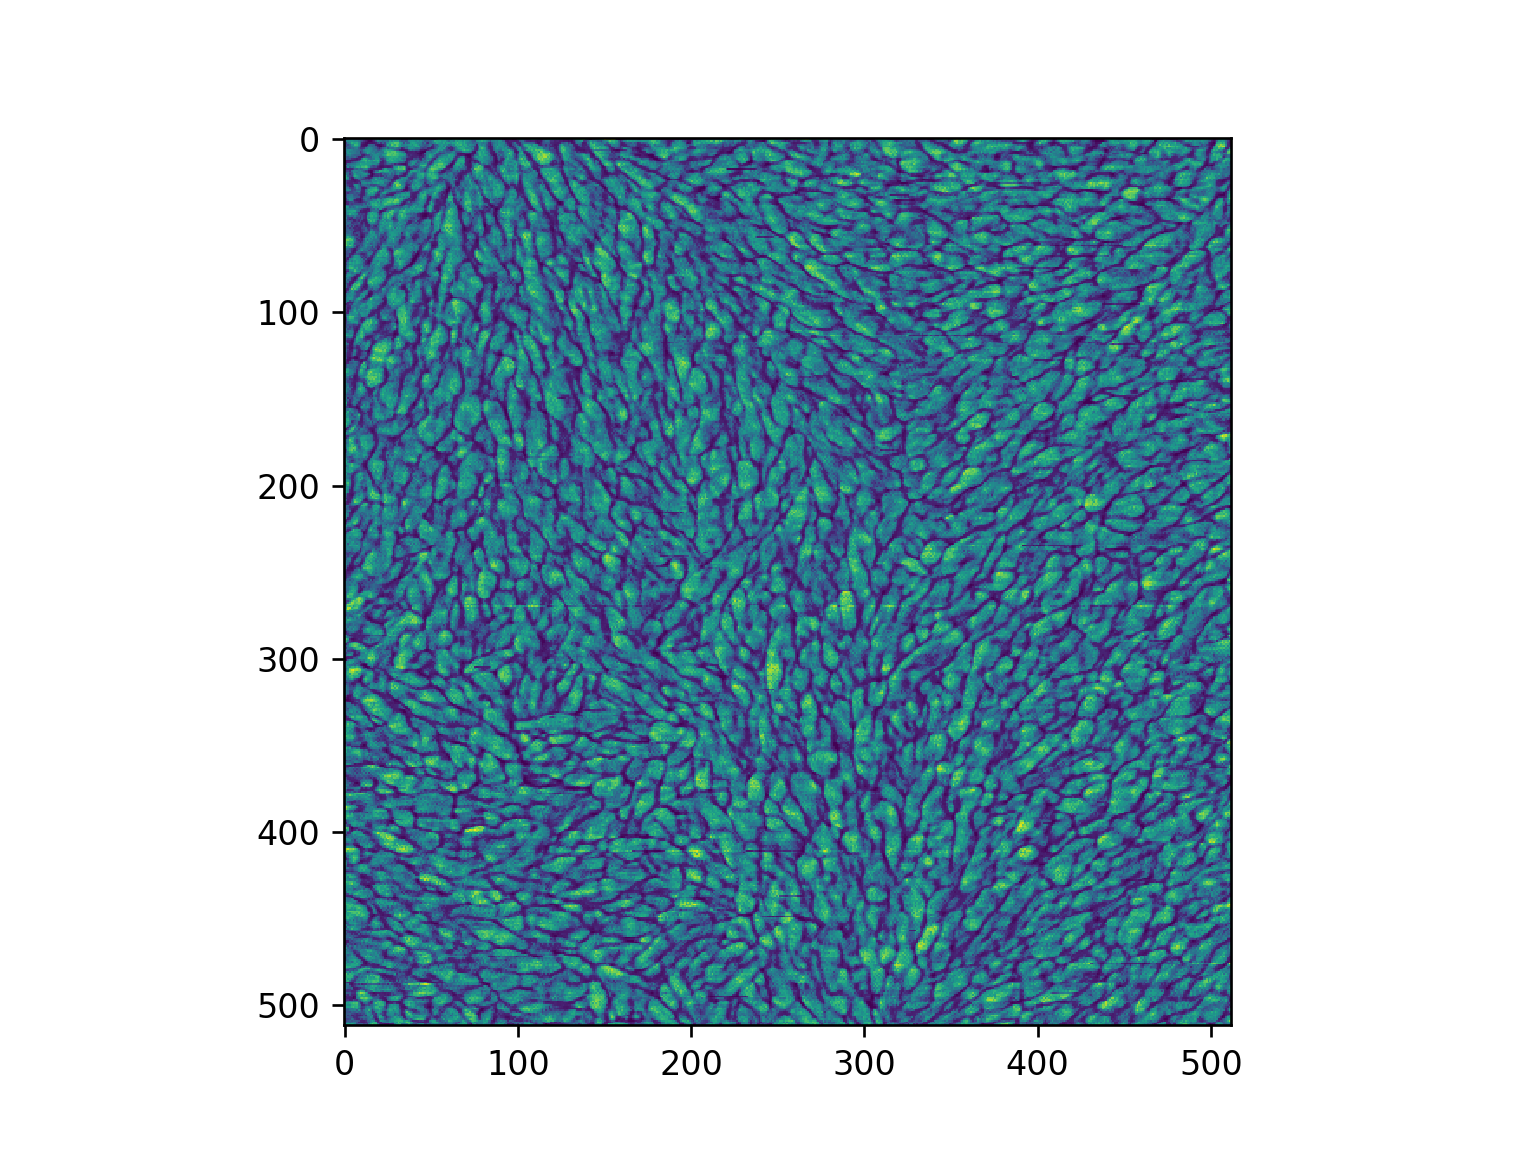

In [61]:
gray=color.rgb2gray(phase)
plt.figure()
plt.imshow(gray)

In [59]:
phase

array([[[140,  80,   0],
        [128,  62,   0],
        [145,  87,   0],
        ..., 
        [ 82,   0,   0],
        [ 55,   0,   0],
        [ 62,   0,   0]],

       [[105,  26,   0],
        [109,  34,   0],
        [120,  49,   0],
        ..., 
        [ 97,  15,   0],
        [ 79,   0,   0],
        [ 80,   0,   0]],

       [[ 97,  15,   0],
        [130,  66,   0],
        [136,  74,   0],
        ..., 
        [ 96,  13,   0],
        [ 67,   0,   0],
        [ 80,   0,   0]],

       ..., 
       [[ 97,  15,   0],
        [ 97,  15,   0],
        [110,  34,   0],
        ..., 
        [157, 106,   0],
        [179, 139,  45],
        [165, 118,   7]],

       [[114,  40,   0],
        [112,  37,   0],
        [125,  57,   0],
        ..., 
        [139,  79,   0],
        [151,  97,   0],
        [153, 100,   0]],

       [[117,  45,   0],
        [139,  79,   0],
        [147,  91,   0],
        ..., 
        [129,  63,   0],
        [121,  52,   0],
        [128,  63,